# Preprocessing Data

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [27]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [74]:
# read in the TB_Data_2000_2022_total_count.csv
df = pd.read_csv("/content/drive/My Drive/project4/resources/TB_Data_2000_2022_total_count.csv")
df

,Indicator,Year,Geography,FIPS,Cases,Rate per 100000
0,Tuberculosis,2000,Alabama,1,310,7.0
1,Tuberculosis,2001,Alabama,1,264,5.9
2,Tuberculosis,2002,Alabama,1,233,5.2
3,Tuberculosis,2003,Alabama,1,258,5.7
4,Tuberculosis,2004,Alabama,1,211,4.7
...,...,...,...,...,...,...
1168,Tuberculosis,2018,Wyoming,56,1,0.2
1169,Tuberculosis,2019,Wyoming,56,1,0.2
1170,Tuberculosis,2020 (COVID-19 Pandemic),Wyoming,56,0,0.0
1171,Tuberculosis,2021,Wyoming,56,3,0.5


In [8]:
# check the data types in the aggregate case count dataset
df.dtypes

Indicator           object
Year                object
Geography           object
FIPS                 int64
Cases               object
Rate per 100000    float64
dtype: object

In [75]:
# update "2020 (COVID-19 Pandemic)" under the Year column to just the year
df.loc[df['Year'] == '2020 (COVID-19 Pandemic)', 'Year'] = '2020'

In [76]:
# convert the Year and Cases columns' data type to integer
df[['Year','Cases']] = df.replace(',', '', regex=True)[['Year','Cases']].astype(int)

In [77]:
# drop the Indicator, FIPS and Rate columns
df = df.drop(columns=['Indicator', 'FIPS', 'Rate per 100000'])
df

,Year,Geography,Cases
0,2000,Alabama,310
1,2001,Alabama,264
2,2002,Alabama,233
3,2003,Alabama,258
4,2004,Alabama,211
...,...,...,...
1168,2018,Wyoming,1
1169,2019,Wyoming,1
1170,2020,Wyoming,0
1171,2021,Wyoming,3


In [78]:
# create a dataframe with annual case counts by state from the last 5 years (from 2015-2019)
df_5yrs = df.loc[(df['Year'] > 2014) & (df['Year'] < 2020)]
df_5yrs

,Year,Geography,Cases
15,2015,Alabama,119
16,2016,Alabama,112
17,2017,Alabama,120
18,2018,Alabama,90
19,2019,Alabama,87
...,...,...,...
1165,2015,Wyoming,4
1166,2016,Wyoming,1
1167,2017,Wyoming,2
1168,2018,Wyoming,1


In [79]:
# total case counts within the 5 years by state and rank the table in descending order
df_5yrs = df_5yrs.groupby(['Geography'], as_index=False).sum()
df_5yrs = df_5yrs.drop(columns=['Year']).sort_values('Cases', ascending=False)
df_5yrs

,Geography,Cases
4,California,10453
43,Texas,5944
32,New York,3812
9,Florida,2938
13,Illinois,1663
30,New Jersey,1501
10,Georgia,1485
47,Washington,1029
20,Maryland,1021
46,Virginia,1014


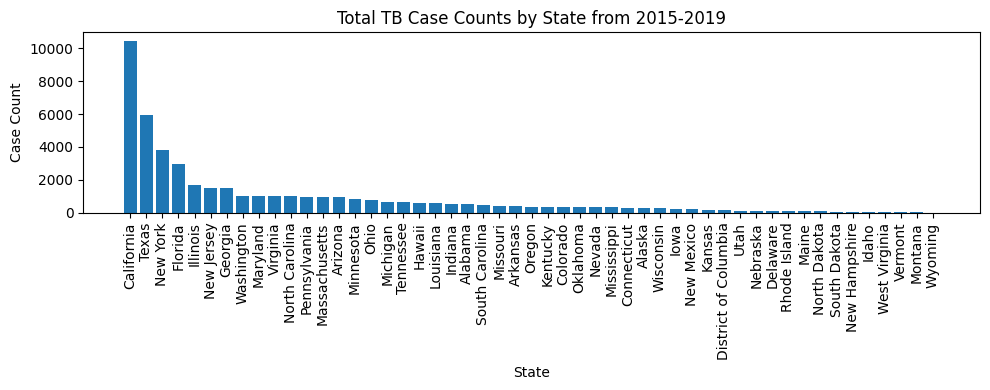

In [80]:
# graph the distribution of total case counts by state within the 5 years
plt.figure(figsize=(10,4))
plt.bar(df_5yrs["Geography"],df_5yrs["Cases"], align="center")

plt.title("Total TB Case Counts by State from 2015-2019")
plt.xlabel("State")
plt.ylabel("Case Count")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()

In [81]:
# divide the case counts into high, medium and low disease burden groups

# first create a function to categorize the states into different levels of disease burden
def burden(cases):
    if cases >= 626:
        return 'High'
    elif cases < 626 and cases >= 202:
        return 'Medium'
    else:
        return 'Low'

# apply the function to the Cases column using the apply() function
df_5yrs['Level'] = df_5yrs['Cases'].apply(burden)
df_5yrs

,Geography,Cases,Level
4,California,10453,High
43,Texas,5944,High
32,New York,3812,High
9,Florida,2938,High
13,Illinois,1663,High
30,New Jersey,1501,High
10,Georgia,1485,High
47,Washington,1029,High
20,Maryland,1021,High
46,Virginia,1014,High


In [82]:
# create a dataframe of the states and their respective burden level and merge into the main dataframe
df_burden = df_5yrs[['Geography', 'Level']]
combined = pd.merge(df, df_burden, how='left', on=['Geography'])
combined

,Year,Geography,Cases,Level
0,2000,Alabama,310,Medium
1,2001,Alabama,264,Medium
2,2002,Alabama,233,Medium
3,2003,Alabama,258,Medium
4,2004,Alabama,211,Medium
...,...,...,...,...
1168,2018,Wyoming,1,Low
1169,2019,Wyoming,1,Low
1170,2020,Wyoming,0,Low
1171,2021,Wyoming,3,Low


In [83]:
# divide the years into pre- and post-covid

# first create a function to categorize pre-/post-covid
def covid(year):
    if year < 2020:
        return 'Pre-COVID'
    else:
        return 'Post-COVID'

# apply the function to the Year column using the apply() function
combined['Year'] = combined['Year'].apply(covid)
combined

,Year,Geography,Cases,Level
0,Pre-COVID,Alabama,310,Medium
1,Pre-COVID,Alabama,264,Medium
2,Pre-COVID,Alabama,233,Medium
3,Pre-COVID,Alabama,258,Medium
4,Pre-COVID,Alabama,211,Medium
...,...,...,...,...
1168,Pre-COVID,Wyoming,1,Low
1169,Pre-COVID,Wyoming,1,Low
1170,Post-COVID,Wyoming,0,Low
1171,Post-COVID,Wyoming,3,Low


In [85]:
# sum the case counts by the level of disease burden
df = combined.groupby(['Year','Geography','Level'], as_index=False).sum()
df

,Year,Geography,Level,Cases
0,Post-COVID,Alabama,Medium,228
1,Post-COVID,Alaska,Medium,211
2,Post-COVID,Arizona,High,419
3,Post-COVID,Arkansas,Medium,196
4,Post-COVID,California,High,5301
...,...,...,...,...
97,Pre-COVID,Virginia,High,5247
98,Pre-COVID,Washington,High,4612
99,Pre-COVID,West Virginia,Low,378
100,Pre-COVID,Wisconsin,Medium,1316


In [97]:
# convert the categorical data (pre-/post-COVID year) to numeric with 'pd.get_dummies'
numeric = pd.get_dummies(df, dtype=int)
numeric

,Cases,Year_Post-COVID,Year_Pre-COVID,Geography_Alabama,Geography_Alaska,Geography_Arizona,Geography_Arkansas,Geography_California,Geography_Colorado,Geography_Connecticut,...,Geography_Utah,Geography_Vermont,Geography_Virginia,Geography_Washington,Geography_West Virginia,Geography_Wisconsin,Geography_Wyoming,Level_High,Level_Low,Level_Medium
0,228,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,211,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,419,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,196,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5301,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5247,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
98,4612,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
99,378,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
100,1316,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [87]:
# filter pre- and post-COVID data
pre_covid_data = numeric[numeric['Year_Pre-COVID'] == 1]
post_covid_data = numeric[numeric['Year_Post-COVID'] == 1]

# pre-COVID data
X_pre_covid = pre_covid_data.drop(['Cases'], axis=1)
y_pre_covid = pre_covid_data['Cases']

# post-COVID data
X_post_covid = post_covid_data.drop(['Cases'], axis=1)
y_post_covid = post_covid_data['Cases']

In [88]:
# split pre-COVID data into training and testing datasets
X_train_pre_covid, X_test_pre_covid, y_train_pre_covid, y_test_pre_covid = train_test_split(X_pre_covid, y_pre_covid, random_state=1)

# split post-COVID data into training and testing datasets
X_train_post_covid, X_test_post_covid, y_train_post_covid, y_test_post_covid = train_test_split(X_post_covid, y_post_covid, random_state=1)

In [89]:
# create a StandardScaler instances
scaler = StandardScaler()

# fit the StandardScaler on pre-COVID (training) data
X_scaler = scaler.fit(X_train_pre_covid)

# transform the training and testing data using the fitted scaler
X_train_pre_covid_scaled = scaler.transform(X_train_pre_covid)
X_test_pre_covid_scaled = scaler.transform(X_test_pre_covid)
X_train_post_covid_scaled = scaler.transform(X_train_post_covid)
X_test_post_covid_scaled = scaler.transform(X_test_post_covid)

# Compile, Train and Evaluate the Model

In [94]:
# define the model
input_features = len(X_train_pre_covid_scaled[0])
nodes1 = 100
#nodes2 = 100

nn_model = tf.keras.models.Sequential()

# first hidden layer
nn_model.add(tf.keras.layers.Dense(units=nodes1, input_dim=input_features, activation='relu'))

# second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=nodes2, activation='relu'))

# output layer
nn_model.add(tf.keras.layers.Dense(units=1))

# check the structure of the model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               5700      
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5801 (22.66 KB)
Trainable params: 5801 (22.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [96]:
# train the model
fit_model = nn_model.fit(X_train_pre_covid_scaled, y_train_pre_covid, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 9ms/step - loss: 106990800.0000 - accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 106989032.0000 - accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 106987456.0000 - accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 106985776.0000 - accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 106984208.0000 - accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 106982792.0000 - accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 106981216.0000 - accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 106979784.0000 - accuracy: 0.0000e+00
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 106978296.0000 - accuracy: 0.0000e+00
Epoch 10/50
2/2 [===========

In [73]:
# evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_post_covid_scaled,y_test_post_covid,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 360548448.0000 - accuracy: 0.0000e+00 - 141ms/epoch - 141ms/step
Loss: 360548448.0, Accuracy: 0.0
